In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("wine+quality/winequality-red.csv", delimiter=';');

In [3]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
X= data.drop(columns=["quality"])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
X.shape

(1599, 11)

In [7]:
n=X.shape[0]
cov_matrix = (X_std.T @ X_std) / (n - 1)

eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

In [8]:
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]


In [9]:
#projecting the data
X_pca = X_std @ eig_vecs

In [10]:
import matplotlib.pyplot as plt

In [17]:
total_variance = np.sum(eig_vals)
print(total_variance)

print(eig_vals)
explained_variance_ratio = eig_vals / total_variance
print(explained_variance_ratio)

cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)

11.006883604505632
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


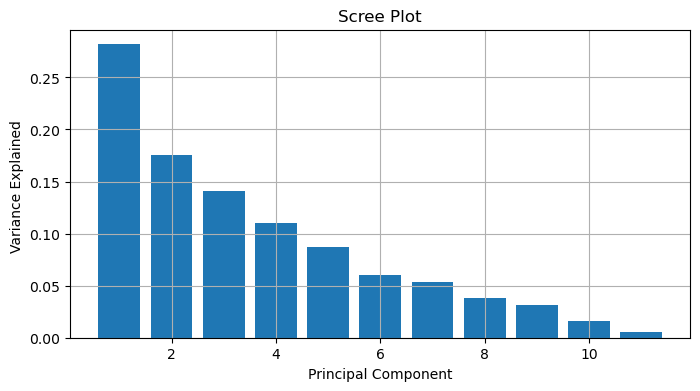

In [12]:
#scree plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eig_vals)+1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained ')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

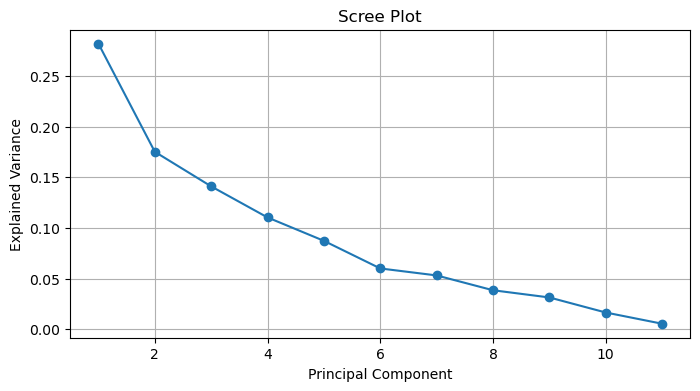

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

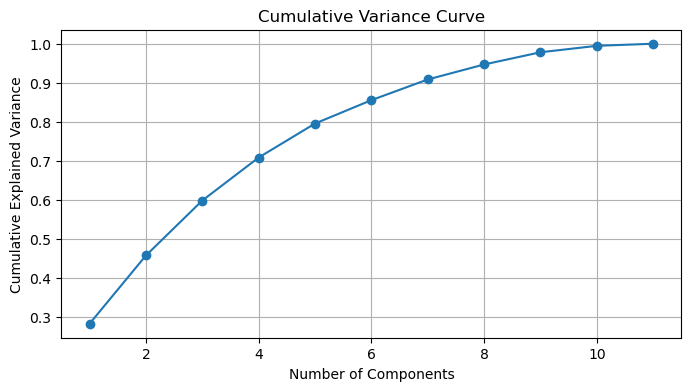

In [14]:
#cumulative variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Curve')
plt.grid(True)
plt.show()

7


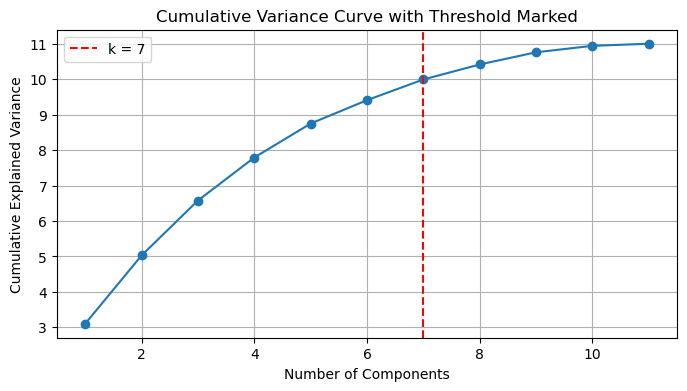

In [21]:
# Find smallest k such that total variance explained ≥ 90%
k = np.argmax(cumulative_variance >= 0.90) + 1 
print(k)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance * total_variance, marker='o')
plt.axvline(x=k, color='r', linestyle='--', label=f'k = {k}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Curve with Threshold Marked')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
#top k eigen vectors
W_k = eig_vecs[:, :k] 

# Project to k-dimensional space
X_k = np.dot(X_std, W_k)  # shape: n_samples × k

# Reconstruct back to original space
X_reconstructed = np.dot(X_k, W_k.T)  # shape: n_samples × n_features


In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(X_std, X_reconstructed)
print("Mean Squared Reconstruction Error:", mse)

Mean Squared Reconstruction Error: 0.09168093590604838
